# Results of analysis

Reading LiME_Binning output

In [1]:
#file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a16.t25.txt"
#file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a16.t20.txt"
#file = "../../../LiME_binning results/single/all_250000_2+RC.fasta.a16.t20.txt"
#file = "../../../LiME_binning results/single/all_250000_1+RC.fasta.a16.t25.txt"
#file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a16.t40.txt"
file = "../../../LiME_binning results/paired/all_250000_1+RC.fasta.a22.t40.txt"

##LEO
file = "../../../all_250000_1+RC.fasta.a22.t40.txt"
Paired = True

if Paired:
    threshold = 40
    
else:
    threshold = 20

In [2]:
f = open(file, "r")

FileNotFoundError: [Errno 2] No such file or directory: '../../../all_250000_1+RC.fasta.a22.t40.txt'

In [15]:
l = []
for x in f:
    l.append(int(x))

f.close()
print("number of reads: ", len(l))

max_val = max(l)

s = []
for x in range(0, max_val+1):
    s.append(0)
    
print("number of clusters: ", len(s))

for i in range(0, len(l)):
    temp = l[i]
    s[temp] = s[temp] + 1


max_set_size = max(s)

max_set = s.index(max_set_size)
print("max set size: ", max_set_size)
print("max set index: ", max_set)

count=0;
for i in range(0, len(s)):
    if s[i]==1:
        count=count + 1

print("number of non grouped reads: ", count)

sorted_s = s

sorted_s.sort(reverse=True)

print("Sizes of ten largest sets:")
for i in range(0, 10):
    print(sorted_s[i])

number of reads:  3125000
number of clusters:  361316
max set size:  318142
max set index:  430
number of non grouped reads:  170884
Sizes of ten largest sets:
318142
62500
62499
62499
62498
62497
62497
62497
62495
62493


In [16]:
cluster_dict = {}

for cluster in l:
    
    if cluster in cluster_dict.keys():
        cluster_dict[cluster] = cluster_dict[cluster] + 1 
    
    else:
        cluster_dict[cluster] = 1

print("len cluster dict: ", len(cluster_dict))

sorted_tuples = sorted(cluster_dict.items(), key=lambda item: item[1], reverse = True)

sorted_dict = {k: v for k, v in sorted_tuples}

len cluster dict:  361316


In [17]:
k = 20 

top_k_cluster = []

i = 0
for cluster, cardinality in sorted_dict.items():
    
    if i <= k:
        top_k_cluster.append([cluster, cardinality])
    
    else:
        break
        
    i = i + 1
    
print(top_k_cluster)

[[430, 318142], [361304, 62500], [361271, 62499], [361299, 62499], [361301, 62498], [361279, 62497], [361283, 62497], [361287, 62497], [361273, 62495], [361291, 62493], [361305, 62490], [127770, 32647], [127343, 20390], [123201, 13533], [95149, 10772], [123198, 9402], [127635, 8830], [123203, 7319], [127633, 6836], [163419, 6510], [123202, 6402]]


In [7]:
import matplotlib.pyplot as plt

top_k_cluster_index = []
top_k_cluster_cardinality = []

for i in range(0, k):
    top_k_cluster_index.append(str(top_k_cluster[i][0]))
    top_k_cluster_cardinality.append(top_k_cluster[i][1])

print(top_k_cluster_index)
print(top_k_cluster_cardinality)

plt.figure(figsize=(15,10))
width = 0.4

plt.bar(top_k_cluster_index, top_k_cluster_cardinality, width = width, color='gold', label='Top clusters')

plt.xlabel('Cluster index', fontsize = 14)
plt.ylabel('Cardinality',fontsize = 14)
plt.title('Top '+str(k)+' clusters', fontweight='bold', fontsize=20)

# save the figure
plt.savefig('Top_k_cluster.png', dpi=300, bbox_inches='tight')

plt.show()

NameError: name 'k' is not defined

In [19]:
def plotALot(cluster_to_show,threshold):

    x = []
    y = []

    for i in range(len(cluster_to_show)):
        x.append(str(cluster_to_show[i][0]))
        y.append(cluster_to_show[i][1])


    plt.figure(figsize=(15,10))
    width = 0.4
    plt.bar(x,y,width=width,color='lightblue',label='Total elements in the cluster')
    plt.xlabel('Cluster',fontsize=14)
    plt.ylabel('Number of reads',fontsize=14)
    plt.legend(loc='upper right')
    plt.title('Top clusters which cover '+str(threshold)+'% of the total',fontweight='bold',fontsize=20)

len of cluster_to_show list:  141
cluster_to_show list:
[[430, 318142], [361304, 62500], [361271, 62499], [361299, 62499], [361301, 62498], [361279, 62497], [361283, 62497], [361287, 62497], [361273, 62495], [361291, 62493], [361305, 62490], [127770, 32647], [127343, 20390], [123201, 13533], [95149, 10772], [123198, 9402], [127635, 8830], [123203, 7319], [127633, 6836], [163419, 6510], [123202, 6402], [94060, 6021], [123200, 5394], [127348, 4289], [178576, 4177], [163424, 4078], [123204, 4056], [178586, 3836], [178584, 3660], [178583, 3172], [163835, 3144], [20846, 2988], [20854, 2979], [20881, 2925], [127358, 2645], [20850, 2633], [163445, 2472], [123199, 2321], [20843, 2298], [127342, 2269], [195665, 2214], [163416, 2187], [179160, 2176], [123384, 2122], [123205, 2089], [163447, 2082], [127353, 2069], [178635, 1971], [163414, 1924], [127356, 1888], [178593, 1875], [178575, 1716], [195687, 1640], [127347, 1565], [195688, 1550], [127349, 1546], [163430, 1545], [195714, 1515], [178599, 

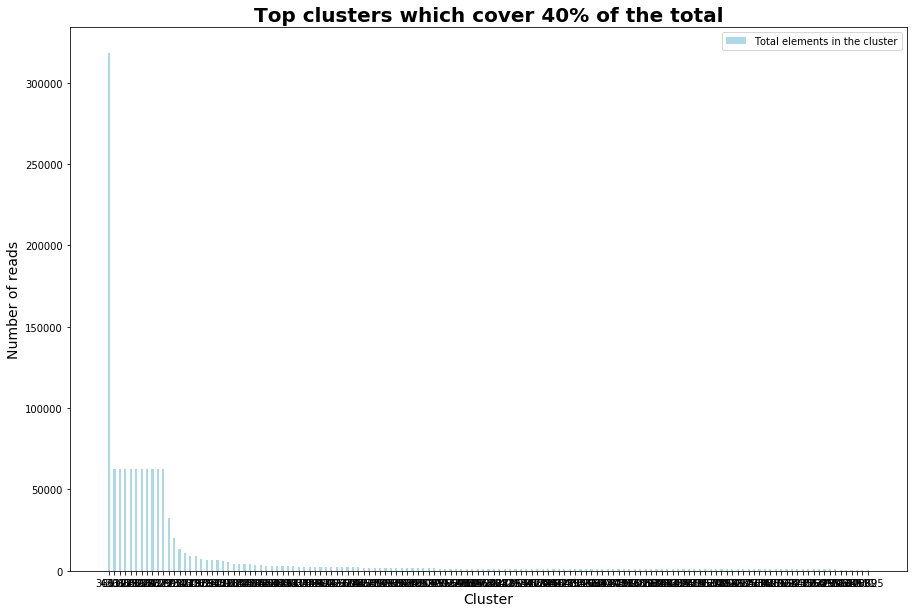

In [20]:
tot_reads = len(l) # number of read clustered
read = 0 # read counter 

cluster_to_show = [] # list of [cluster, cardinality] pairs 

for cluster, cardinality in sorted_dict.items():
    
    read = read + cardinality
    
    if read / tot_reads * 100 <= threshold:
        cluster_to_show.append([cluster, cardinality])
        
    else:
        break

print("len of cluster_to_show list: ", len(cluster_to_show))
print("cluster_to_show list:")
print(cluster_to_show)

plotALot(cluster_to_show, threshold)

#in this way I can show clusters which cover the "threshold" part of the entire reads.

In [21]:
import csv

with open('clustering.csv', 'w', newline='') as csvfile:
    fieldnames = ['cluster_index', 'cardinality']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for cluster, cardinality in cluster_dict.items():
        writer.writerow({'cluster_index': cluster, 'cardinality': cardinality})

In [3]:
import pandas as pd
import numpy as np

In [8]:

paired3040 = pd.read_csv('clustering.csv')

paired2240 = pd.read_csv('paired2240clustering.csv')

Text(0, 0.5, 'cardinality')

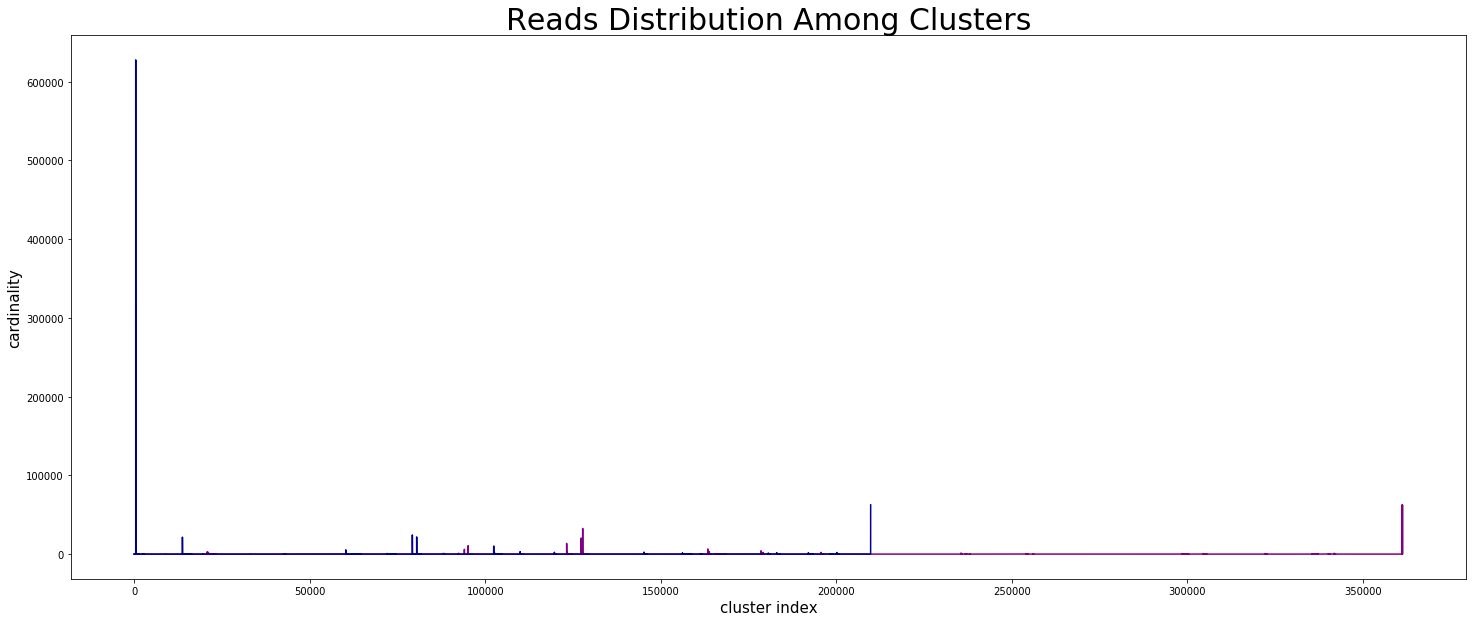

In [9]:
plt.figure(figsize=(25, 10))
#plt.plot(single20['cardinality'], color = 'red')
#plt.plot(single25['cardinality'], color = 'blue')
#plt.plot(paired20['cardinality'], color = 'green')
#plt.plot(paired25['cardinality'], color = 'yellow')
plt.plot(paired3040['cardinality'], color = 'purple')
plt.plot(paired2240['cardinality'], color = 'darkblue')

plt.title("Reads Distribution Among Clusters", fontsize = 30)
plt.xlabel("cluster index", fontsize = 15)
plt.ylabel("cardinality", fontsize = 15)

Text(0, 0.5, 'cardinality')

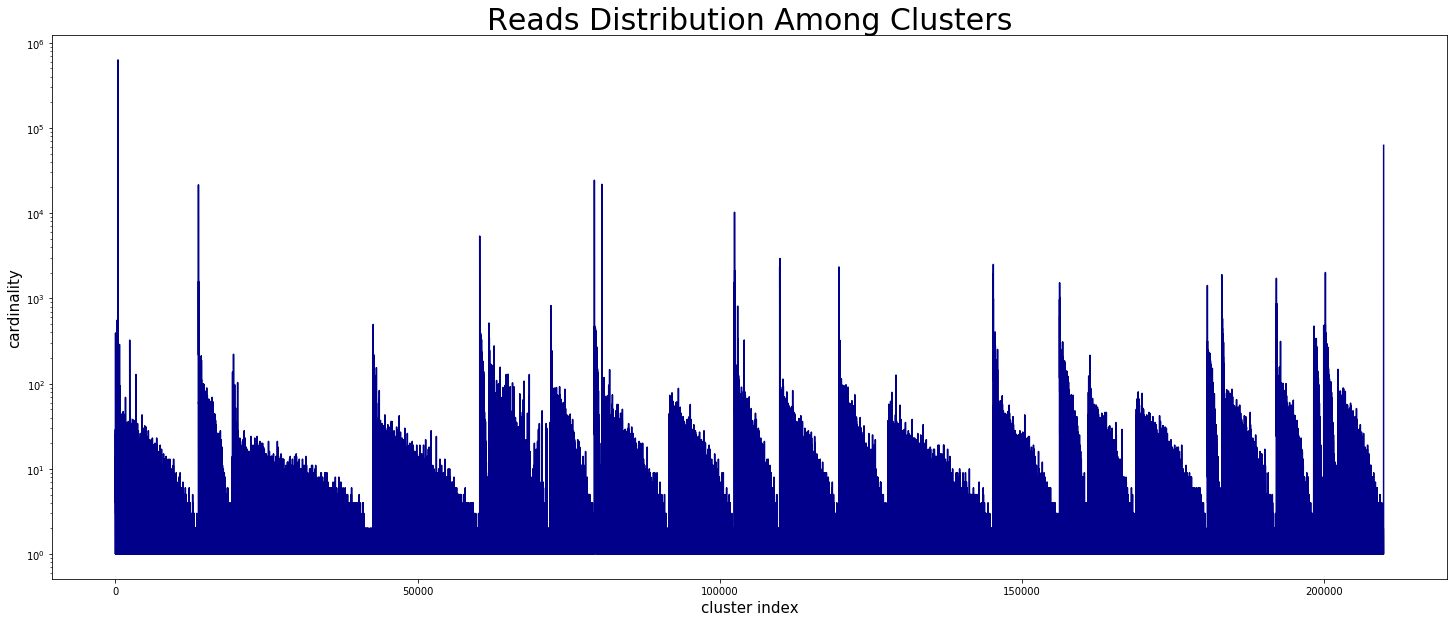

In [10]:
plt.figure(figsize=(25, 10))
#plt.plot(single20['cardinality'], color = 'red')
#plt.plot(single25['cardinality'], color = 'blue')
#plt.plot(paired20['cardinality'], color = 'green')
#plt.plot(paired25['cardinality'], color = 'yellow')
#plt.plot(paired40['cardinality'], color = 'purple')
plt.plot(paired2240['cardinality'], color = 'darkblue')

plt.yscale('log')
plt.title("Reads Distribution Among Clusters", fontsize = 30)
plt.xlabel("cluster index", fontsize = 15)
plt.ylabel("cardinality", fontsize = 15)

